Importowanie bibliotek i wczytanie danych

In [5]:
# Importowanie niezbędnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienie stylu wykresów
sns.set(style='whitegrid', palette='deep')
%matplotlib inline

# Wczytanie oczyszczonego zestawu danych
df = pd.read_csv('data/cleaned_data.csv')

# Wyświetlenie pierwszych 5 wierszy
df.head()

,Posted On,BHK,Rent,Size,Bathroom,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Floor Level,Total Floors,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2022-05-18,2,10000,1100.0,2,False,True,0,2.0,False,True,False,False,False,True,False,True,False
1,2022-05-13,2,20000,800.0,1,True,False,1,3.0,False,True,False,False,False,True,False,True,False
2,2022-05-16,2,17000,1000.0,1,True,False,1,3.0,False,True,False,False,False,True,False,True,False
3,2022-07-04,2,10000,800.0,1,False,True,1,2.0,False,True,False,False,False,True,False,True,False
4,2022-05-09,2,7500,850.0,1,False,True,1,2.0,True,False,False,False,False,True,False,False,False


Podstawowa analiza danych

In [6]:
# Informacje o danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Posted On                          4746 non-null   object 
 1   BHK                                4746 non-null   int64  
 2   Rent                               4746 non-null   int64  
 3   Size                               4746 non-null   float64
 4   Bathroom                           4746 non-null   int64  
 5   Furnishing Status_Semi-Furnished   4746 non-null   bool   
 6   Furnishing Status_Unfurnished      4746 non-null   bool   
 7   Floor Level                        4746 non-null   int64  
 8   Total Floors                       4742 non-null   float64
 9   Area Type_Carpet Area              4746 non-null   bool   
 10  Area Type_Super Area               4746 non-null   bool   
 11  City_Chennai                       4746 non-null   bool 

Statystyki opisowe

In [7]:
# Statystyki opisowe dla zmiennych numerycznych
df.describe()

,BHK,Rent,Size,Bathroom,Floor Level,Total Floors
count,4746.000000,4.746000e+03,4746.000000,4746.000000,4746.000000,4742.000000
mean,2.083860,3.499345e+04,967.490729,1.965866,3.433628,6.973429
std,0.832256,7.810641e+04,634.202328,0.884532,5.776111,9.469727
min,1.000000,1.200000e+03,10.000000,1.000000,-2.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000,1.000000,2.000000
50%,2.000000,1.600000e+04,850.000000,2.000000,2.000000,4.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000,3.000000,6.000000
max,6.000000,3.500000e+06,8000.000000,10.000000,76.000000,89.000000


Sprawdzenie brakujących wartości

In [8]:
# Sprawdzenie brakujących wartości
df.isnull().sum()

Posted On                            0
BHK                                  0
Rent                                 0
Size                                 0
Bathroom                             0
Furnishing Status_Semi-Furnished     0
Furnishing Status_Unfurnished        0
Floor Level                          0
Total Floors                         4
Area Type_Carpet Area                0
Area Type_Super Area                 0
City_Chennai                         0
City_Delhi                           0
City_Hyderabad                       0
City_Kolkata                         0
City_Mumbai                          0
Tenant Preferred_Bachelors/Family    0
Tenant Preferred_Family              0
dtype: int64

Analiza zmiennej docelowej (Rent)

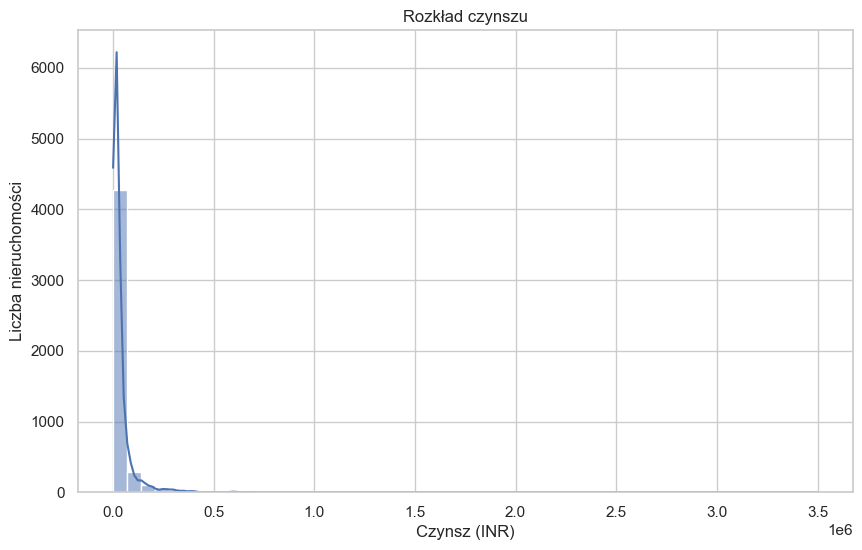

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64


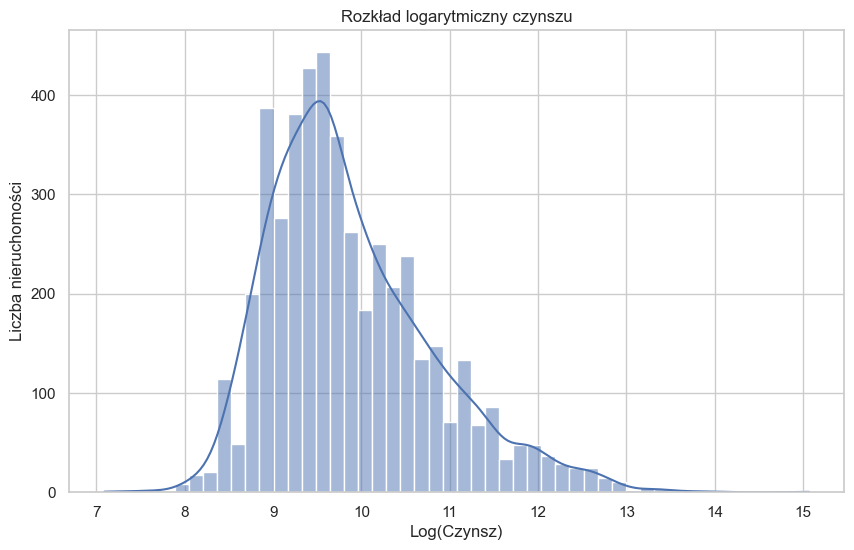

In [9]:
# Histogram rozkładu czynszu
plt.figure(figsize=(10,6))
sns.histplot(df['Rent'], bins=50, kde=True)
plt.title('Rozkład czynszu')
plt.xlabel('Czynsz (INR)')
plt.ylabel('Liczba nieruchomości')
plt.show()

# Statystyki zmiennej 'Rent'
print(df['Rent'].describe())

# Transformacja logarytmiczna zmiennej 'Rent'
df['Rent_Log'] = np.log1p(df['Rent'])

# Histogram rozkładu logarytmicznego czynszu
plt.figure(figsize=(10,6))
sns.histplot(df['Rent_Log'], bins=50, kde=True)
plt.title('Rozkład logarytmiczny czynszu')
plt.xlabel('Log(Czynsz)')
plt.ylabel('Liczba nieruchomości')
plt.show()

Analiza cech numerycznych

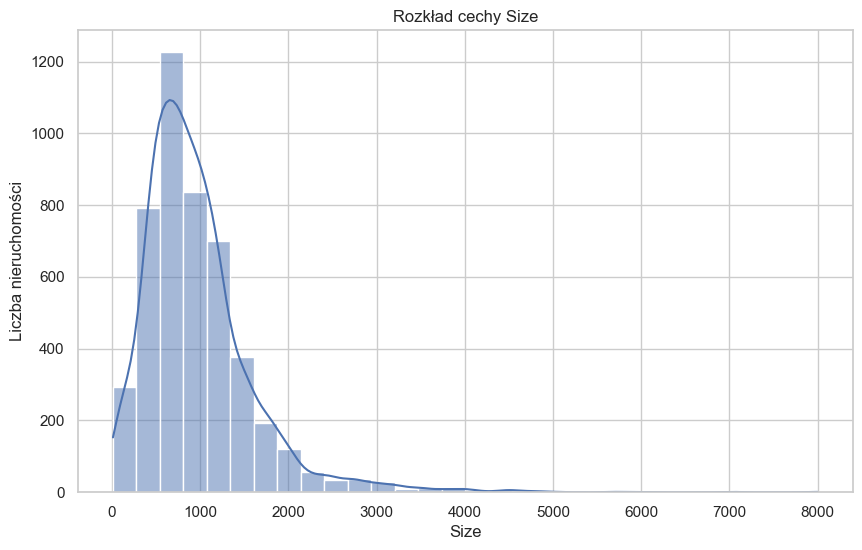

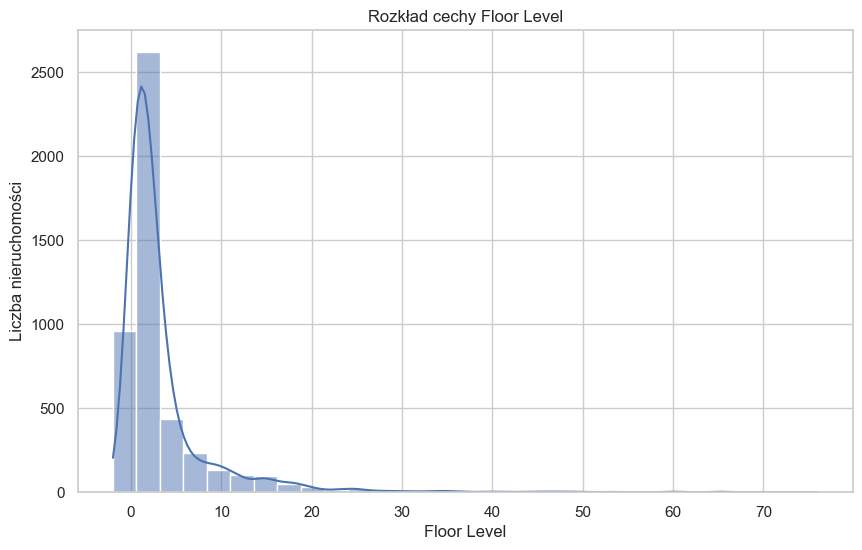

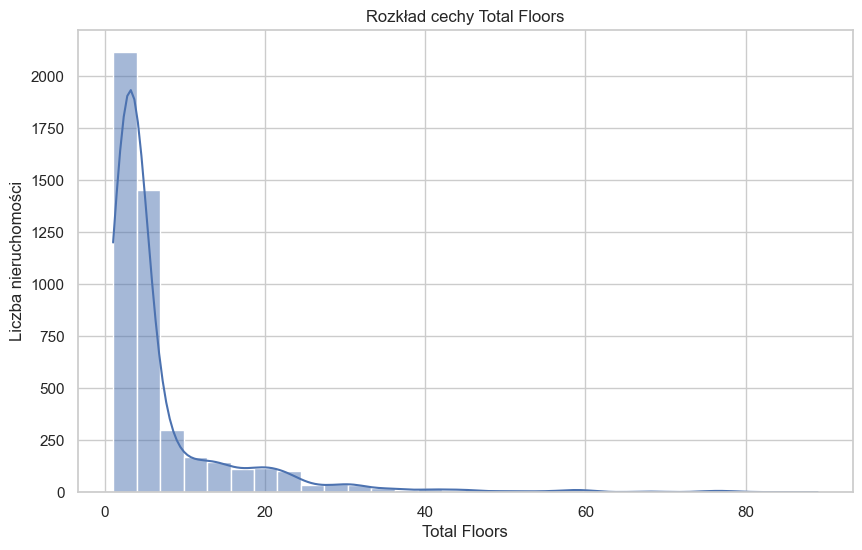

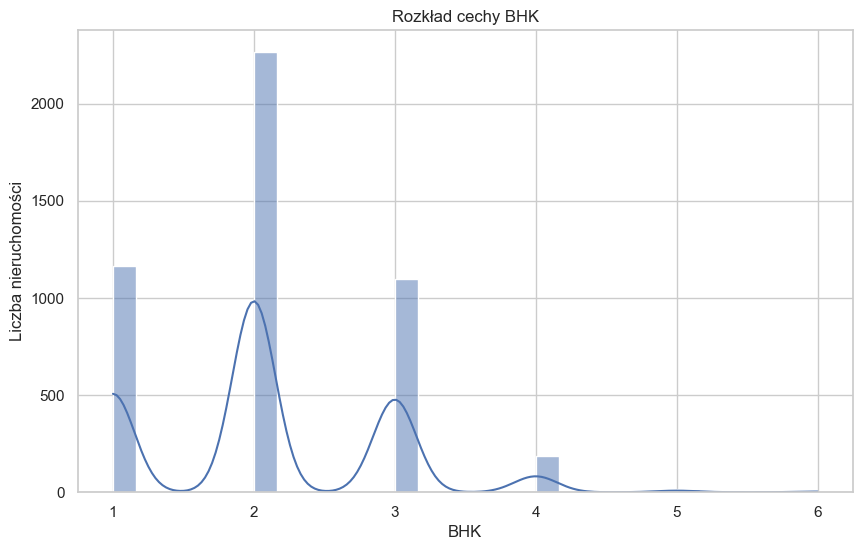

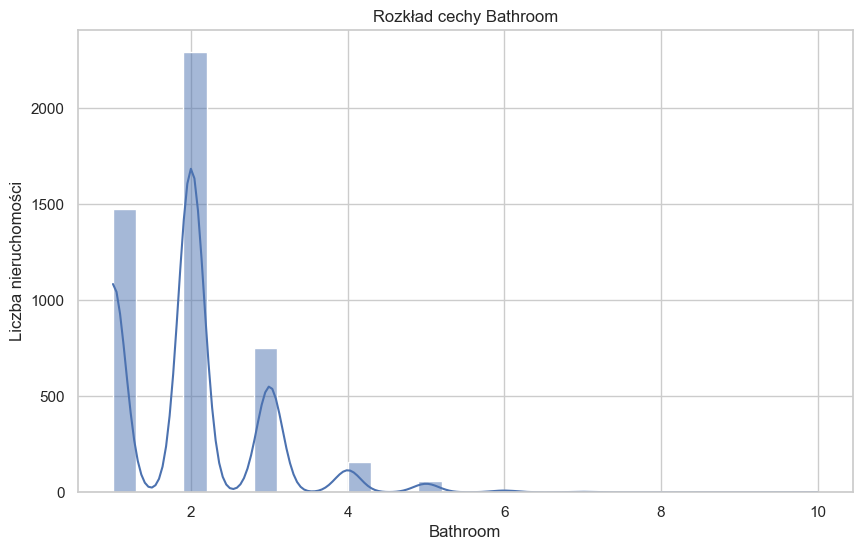

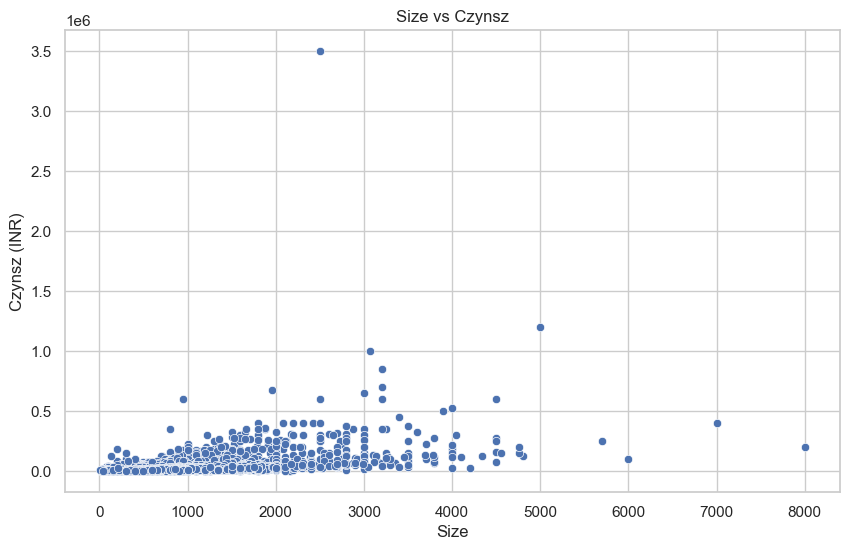

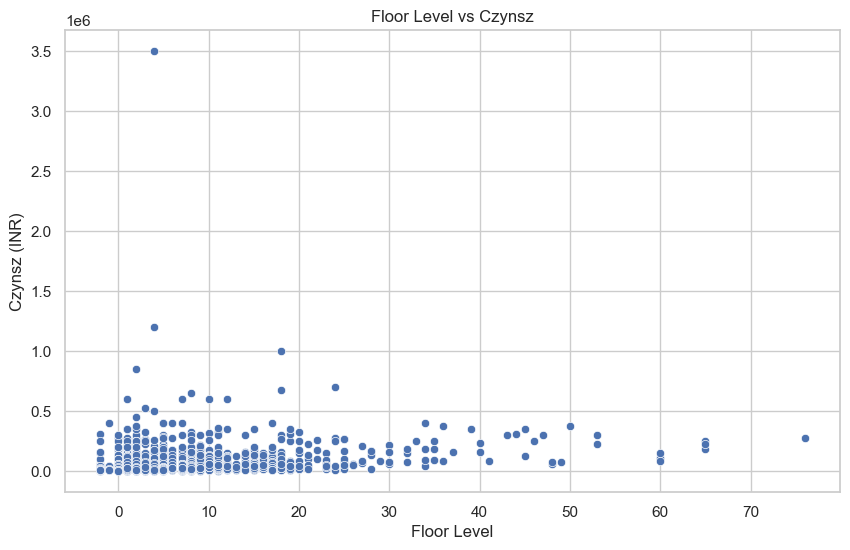

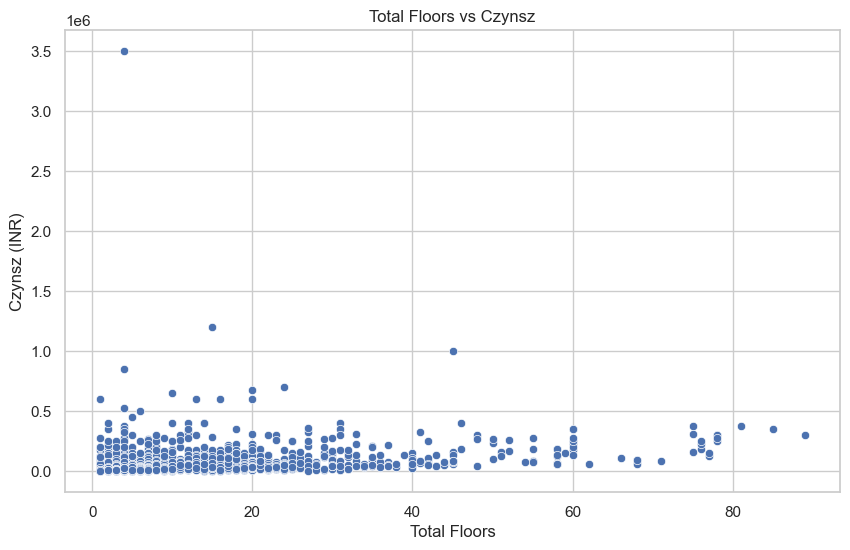

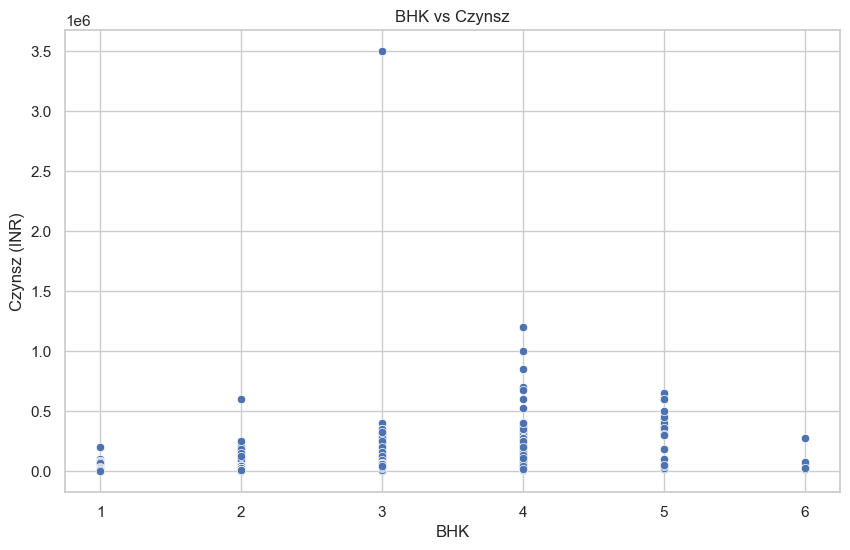

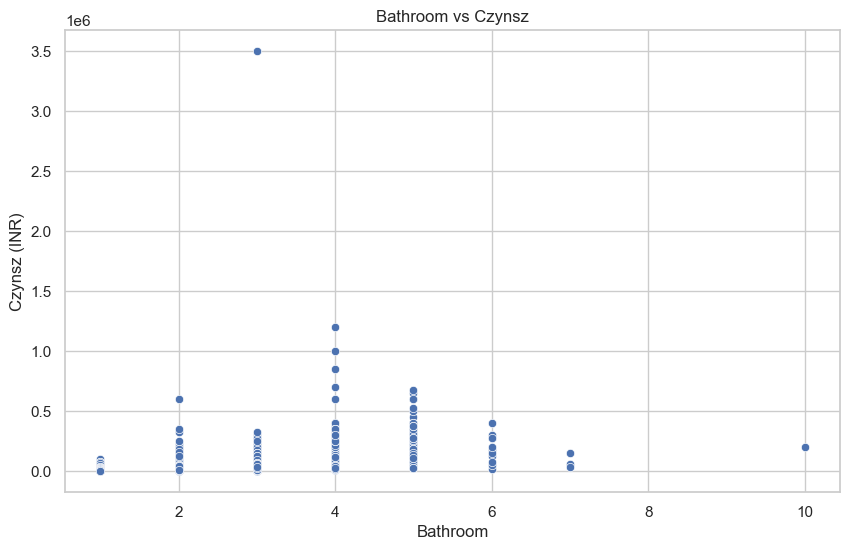

In [10]:
# Lista cech numerycznych
numeric_features = ['Size', 'Floor Level', 'Total Floors', 'BHK', 'Bathroom']

# Statystyki opisowe cech numerycznych
df[numeric_features].describe()

# Wykresy rozkładów
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Rozkład cechy {feature}')
    plt.xlabel(feature)
    plt.ylabel('Liczba nieruchomości')
    plt.show()
    
# Wykresy zależności
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=feature, y='Rent', data=df)
    plt.title(f'{feature} vs Czynsz')
    plt.xlabel(feature)
    plt.ylabel('Czynsz (INR)')
    plt.show()

Analiza cech kategorycznych

Kolumna City

In [11]:
# Lista kolumn dotyczących miasta
city_columns = [col for col in df.columns if 'City_' in col]

# Odtworzenie kolumny 'City'
def get_city(row):
    for col in city_columns:
        if row[col] == 1:
            return col.replace('City_', '')
    return 'Other'

df['City'] = df.apply(get_city, axis=1)

Kolumna Furnishing Status

In [12]:
# Lista kolumn dotyczących stanu umeblowania
furnishing_columns = [col for col in df.columns if 'Furnishing Status_' in col]

# Odtworzenie kolumny 'Furnishing Status'
def get_furnishing_status(row):
    for col in furnishing_columns:
        if row[col] == 1:
            return col.replace('Furnishing Status_', '')
    return 'Furnished'  # Zakładamy, że 'Furnished' zostało usunięte przez 'drop_first=True'

df['Furnishing Status'] = df.apply(get_furnishing_status, axis=1)

Kolumna Tenant Preferred

In [13]:
# Lista kolumn dotyczących preferencji najemcy
tenant_columns = [col for col in df.columns if 'Tenant Preferred_' in col]

# Odtworzenie kolumny 'Tenant Preferred'
def get_tenant_preferred(row):
    for col in tenant_columns:
        if row[col] == 1:
            return col.replace('Tenant Preferred_', '')
    return 'Bachelors'  # Zakładamy, że 'Bachelors' zostało usunięte przez 'drop_first=True'

df['Tenant Preferred'] = df.apply(get_tenant_preferred, axis=1)

Analiza wpływu cech kategorycznych na czynsz

Czynsz w zależności od miasta

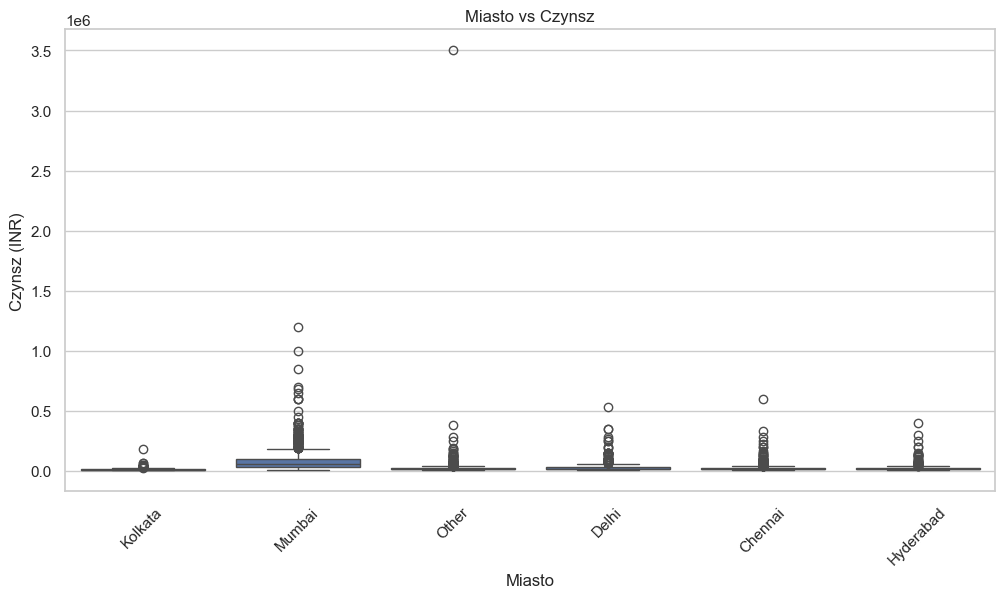

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='City', y='Rent', data=df)
plt.title('Miasto vs Czynsz')
plt.xlabel('Miasto')
plt.ylabel('Czynsz (INR)')
plt.xticks(rotation=45)
plt.show()

Obserwacja: Do uzupelnienia

Czynsz w zależności od stanu umeblowania

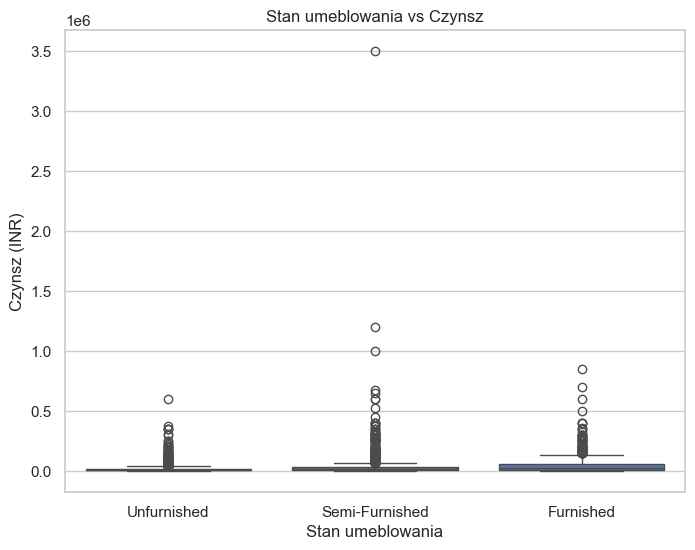

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Furnishing Status', y='Rent', data=df)
plt.title('Stan umeblowania vs Czynsz')
plt.xlabel('Stan umeblowania')
plt.ylabel('Czynsz (INR)')
plt.show()

Obserwacja: Do uzupelnienia

Czynsz w zależności od preferencji najemcy

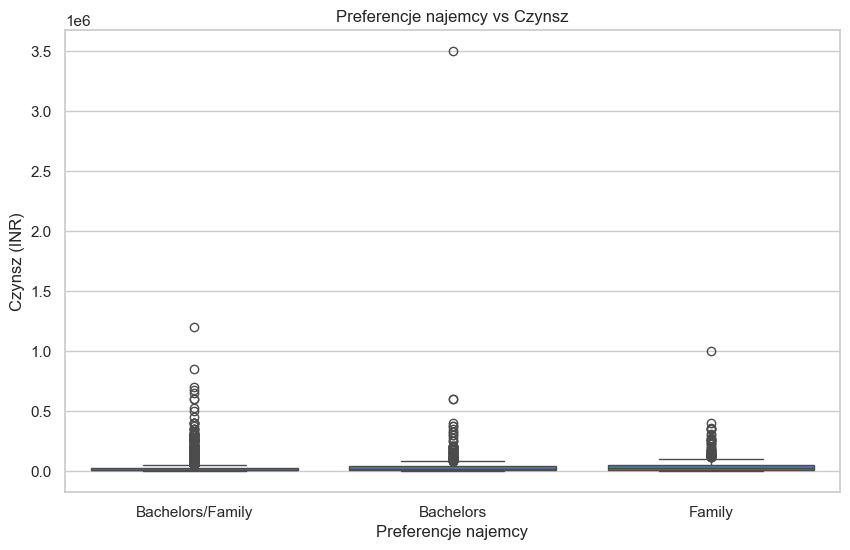

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Tenant Preferred', y='Rent', data=df)
plt.title('Preferencje najemcy vs Czynsz')
plt.xlabel('Preferencje najemcy')
plt.ylabel('Czynsz (INR)')
plt.show()

Obserwacja: Do uzupelnienia

Analiza korelacji

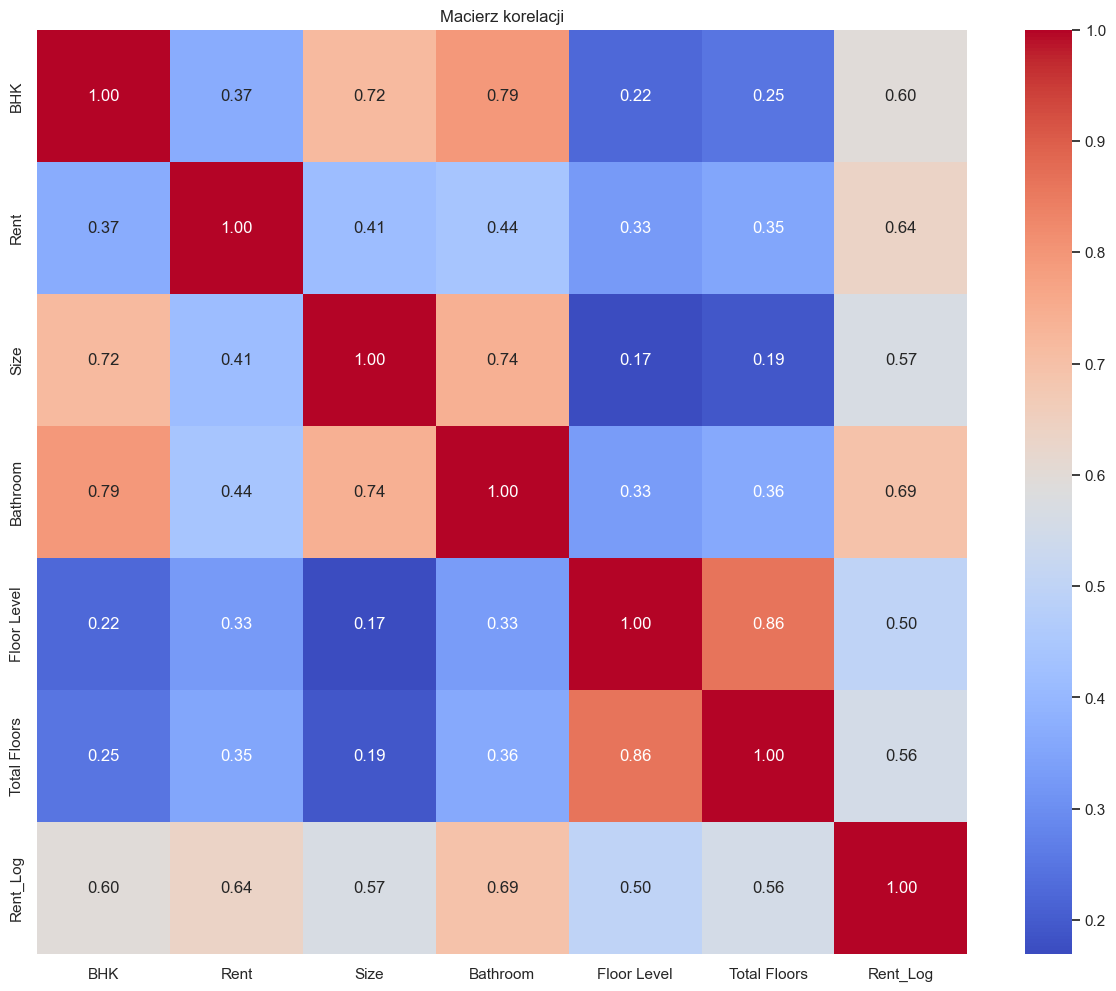

In [20]:
# Wybór tylko kolumn numerycznych
numeric_df = df.select_dtypes(include=[np.number])

# Obliczenie macierzy korelacji
corr_matrix = numeric_df.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

Obserwacje:
Do uzupelnienia

Identyfikacja i obsługa wartości odstających

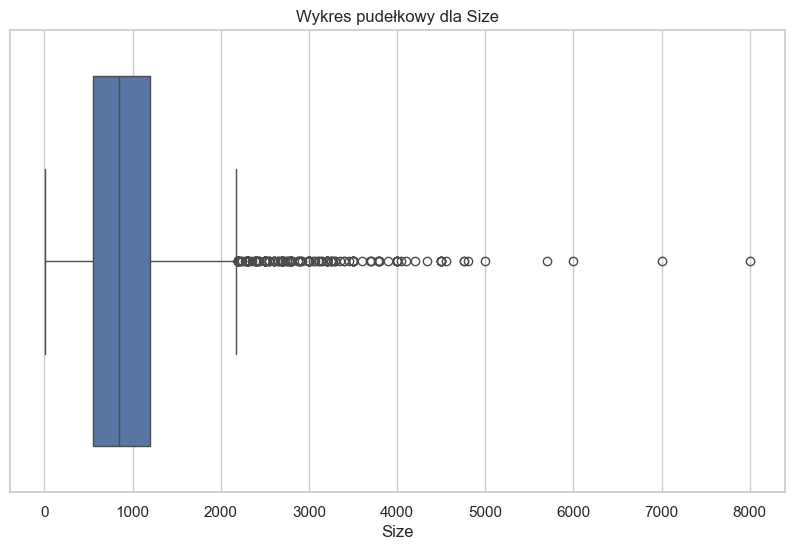

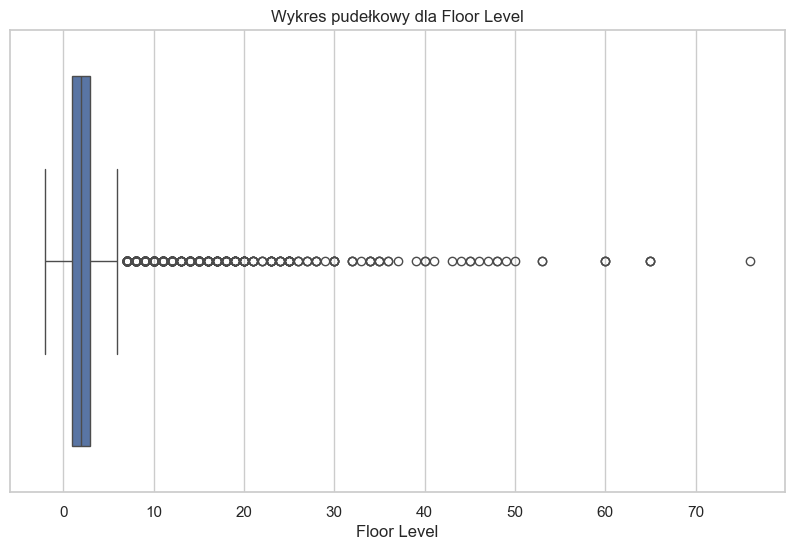

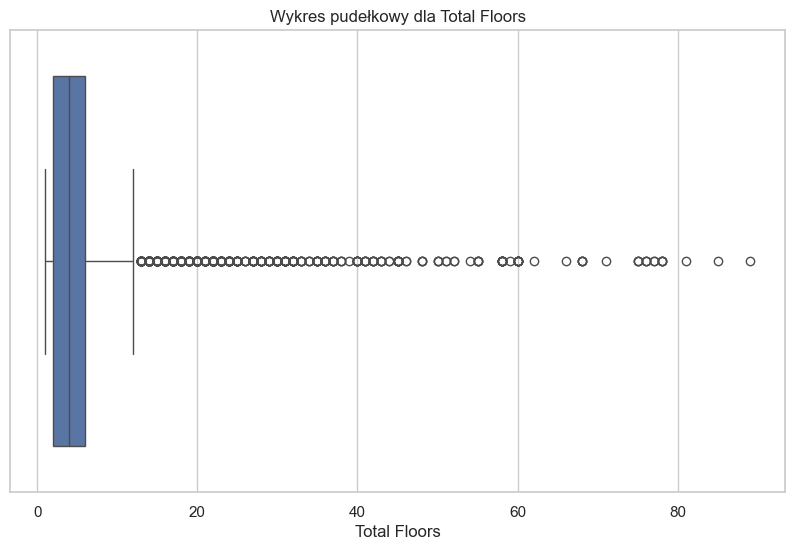

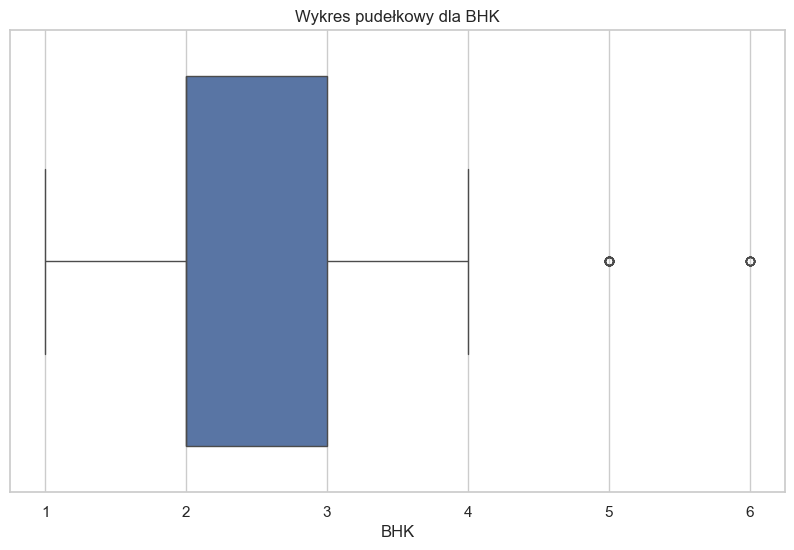

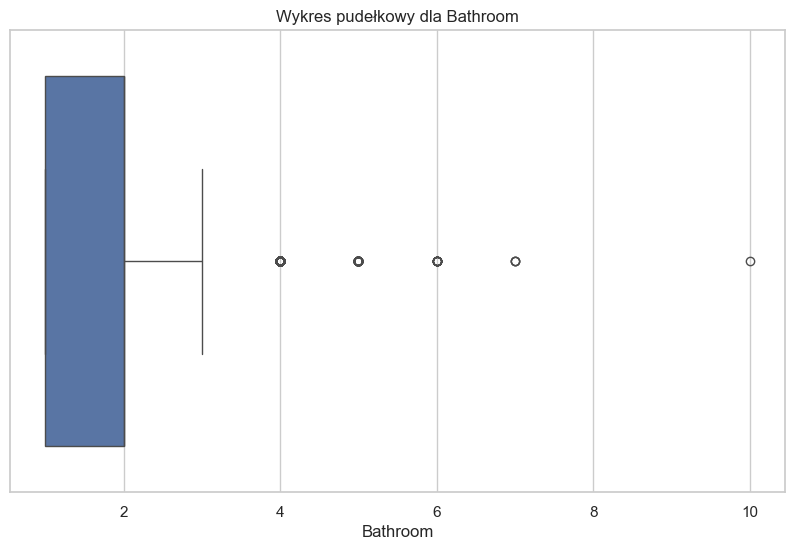

In [24]:
# Wykresy pudełkowe
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[feature])
    plt.title(f'Wykres pudełkowy dla {feature}')
    plt.xlabel(feature)
    plt.show()

Usunięcie wartości odstających

In [22]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df_filtered = df[(df[feature] >= lower_limit) & (df[feature] <= upper_limit)]
    return df_filtered

# Usunięcie wartości odstających z 'Rent'
df_no_outliers = remove_outliers(df, 'Rent')

# Porównanie rozmiarów zbiorów danych
print(f'Liczba obserwacji przed usunięciem: {len(df)}')
print(f'Liczba obserwacji po usunięciu: {len(df_no_outliers)}')

Liczba obserwacji przed usunięciem: 4746
Liczba obserwacji po usunięciu: 4226


Ponowna analiza po usunięciu wartości odstających

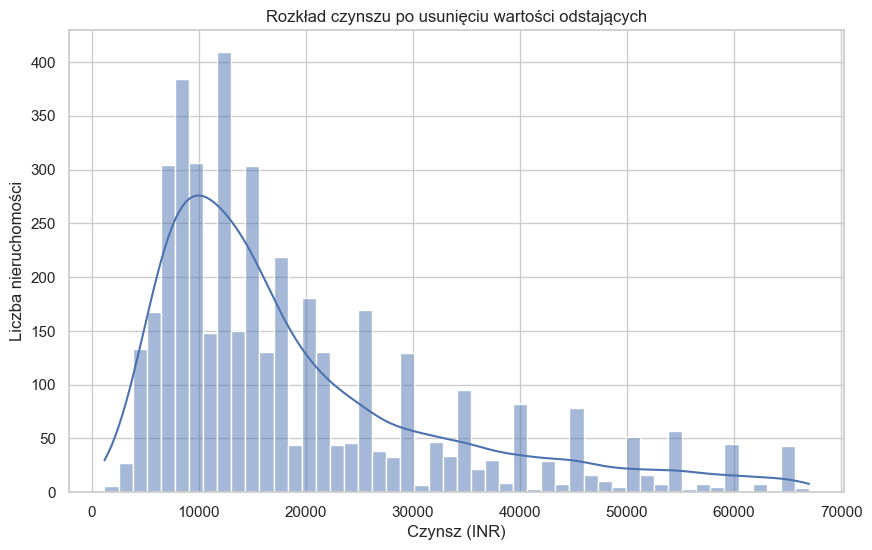

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers['Rent'], bins=50, kde=True)
plt.title('Rozkład czynszu po usunięciu wartości odstających')
plt.xlabel('Czynsz (INR)')
plt.ylabel('Liczba nieruchomości')
plt.show()

Zapisanie danych po usunięciu zmiennych odstających

In [26]:
# Zapisanie oczyszczonego zbioru danych do pliku CSV
df_no_outliers.to_csv('data/cleaned_data_no_outliers.csv', index=False)